In [1]:
#import necessary libraries
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#split into test and train data
(train_digits, train_labels), (test_digits, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_digits, test_digits = train_digits / 255.0, test_digits / 255.0

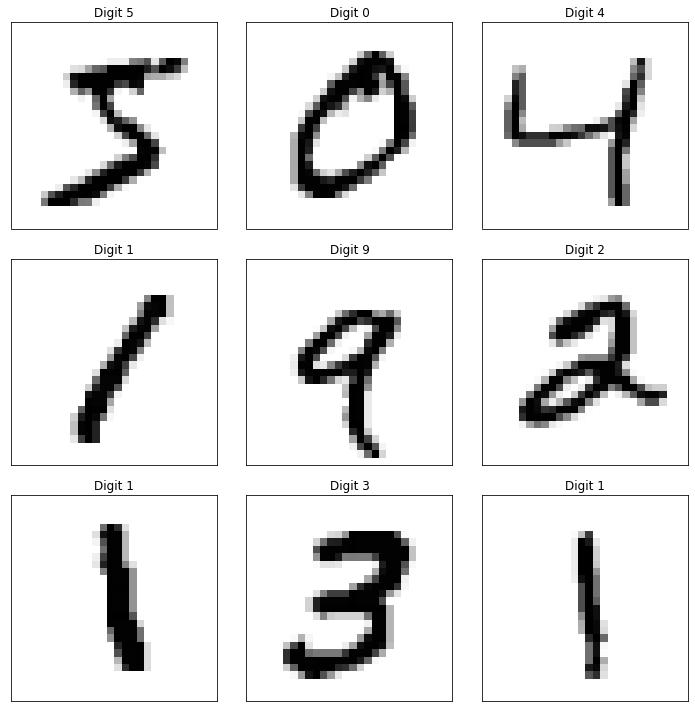

In [3]:
#show first 9 images
class_names = ['Digit 0','Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5',
               'Digit 6', 'digit 7', 'Digit 8', 'Digit 9']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.title(class_names [train_labels[i]])
plt.tight_layout() 
plt.show()


In [4]:
#Prepare training data
train_digits = train_digits.reshape(60000,28,28,1)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)

#Prepare test data
test_digits = test_digits.reshape(10000,28,28,1)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [5]:
#train model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [7]:
model.summary()
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_digits, train_labels, epochs=8, 
                    validation_data=(test_digits, test_labels))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

KeyboardInterrupt: 

### Evaluate the model

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_digits,  test_labels, verbose=2)

In [ ]:
print(test_acc)